# Gold Price Prediction with Python

Gold has always held a prominent place in the country’s economy and among the people. In this article, I will introduce you to a machine learning tutorial on Gold Price Prediction with Python.

Gold prices have historically skyrocketed, peaking at $ 1,800 in 2020. These swings that gold has faced can be attributed to several events that occurred during the period. Stock prices are strongly correlated with public information and world events, and gold is no exception.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("gold_price.csv", parse_dates=True, index_col='Date')

In [3]:
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4718 entries, 2001-01-02 to 2019-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD (AM)   4718 non-null   float64
 1   USD (PM)   4682 non-null   float64
 2   GBP (AM)   4718 non-null   float64
 3   GBP (PM)   4682 non-null   float64
 4   EURO (AM)  4718 non-null   float64
 5   EURO (PM)  4682 non-null   float64
dtypes: float64(6)
memory usage: 258.0 KB


In [5]:
df.isnull().sum()

USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [7]:
df['USD (PM)'].fillna( method ='ffill', inplace = True)
df['GBP (PM)'].fillna( method ='ffill', inplace = True)
df['EURO (PM)'].fillna( method ='ffill', inplace = True)

In [8]:
df.isnull().sum()

USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

Now let’s do some data preparation to fit the data properly in our machine learning model:

In [12]:
df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df.Return.shift()

In [13]:
df

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334,NaN,NaN
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655,-1.457027,NaN
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,0.336574,0.112317
...,...,...,...,...,...,...,...,...
2019-08-27,1531.85,1532.95,1250.910,1247.510,1378.970,1380.880,1.938423,0.116507
2019-08-28,1541.75,1537.15,1263.310,1258.770,1389.890,1387.430,0.273982,1.938423
2019-08-29,1536.65,1540.20,1260.510,1262.960,1387.290,1392.030,0.198419,0.273982


In [15]:
df = df.dropna()
df

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481,0.336574,0.112317
2001-01-09,267.75,267.00,179.855,179.195,284.507,283.590,-0.484532,0.336574
2001-01-10,266.70,266.30,178.777,178.665,283.573,283.298,-0.262172,-0.484532
...,...,...,...,...,...,...,...,...
2019-08-27,1531.85,1532.95,1250.910,1247.510,1378.970,1380.880,1.938423,0.116507
2019-08-28,1541.75,1537.15,1263.310,1258.770,1389.890,1387.430,0.273982,1.938423
2019-08-29,1536.65,1540.20,1260.510,1262.960,1387.290,1392.030,0.198419,0.273982


In [16]:
train = df['2001':'2018']
test = df['2019']

In [17]:
# Create train and test sets for dependent and independent variables

X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

### Using Linear Regression Model
Now as we have prepared the data to fit in a machine learning model for the task of gold price prediction, the next step is to choose a machine learning algorithm. For this task, I will use the Linear Regression algorithm:



In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

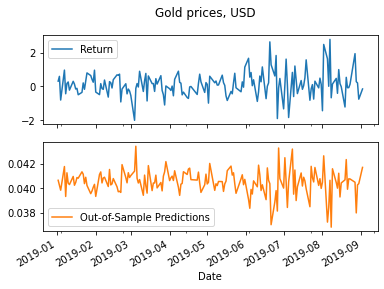

In [19]:
import matplotlib.pyplot as plt
out_of_sample_results = y_test.to_frame()
# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()